<a href="https://colab.research.google.com/github/KarKit2001/Political_Figures_Classification/blob/main/political_figures_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Sports Celebrity Image Classification<h2>

Special thanks to Dhaval Patel from codebasics for help with this project

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [ ]:
import os
# Verify the file exists
file_path = '/content/test_images/EmmanuelMacron.jpg'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Image file not found at: {file_path}")

# Load the image using cv2.imread()
img = cv2.imread(file_path)

# Check if image loading was successful
if img is None:
    raise IOError(f"Error loading image from: {file_path}. Check file integrity and permissions.")

# Now access img.shape, which should work without error
print(img.shape)

(294, 294, 3)


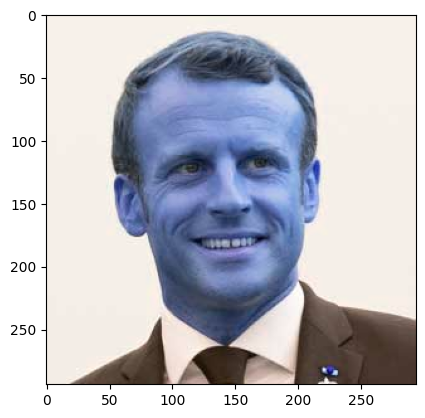

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(294, 294)

array([[240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       ...,
       [236, 236, 236, ...,  52,  52,  53],
       [236, 236, 236, ...,  52,  52,  53],
       [236, 236, 236, ...,  52,  52,  53]], dtype=uint8)
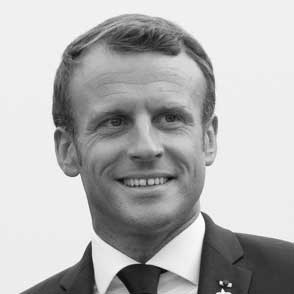

In [ ]:
gray

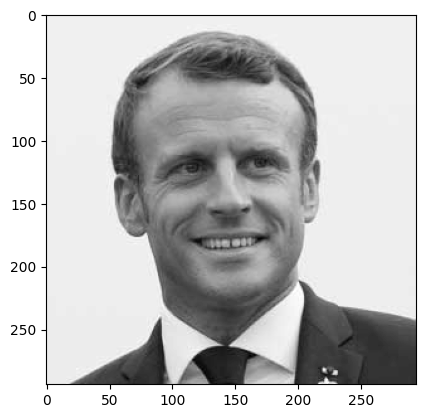

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 61,  56, 166, 166]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(61, 56, 166, 166)

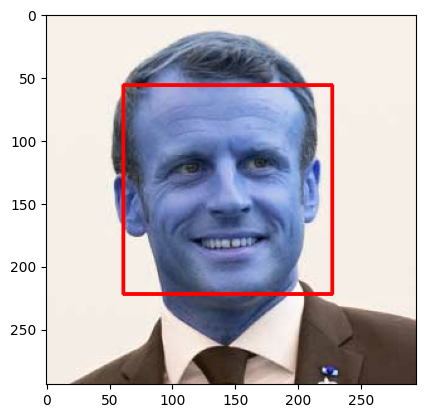

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

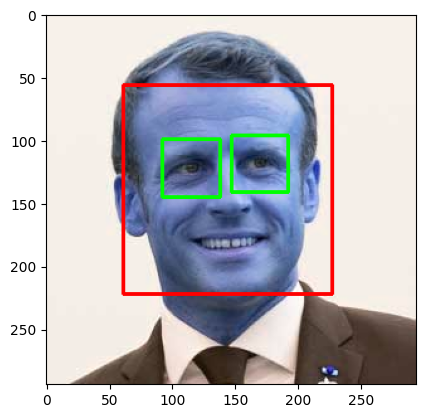

In [ ]:
#cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

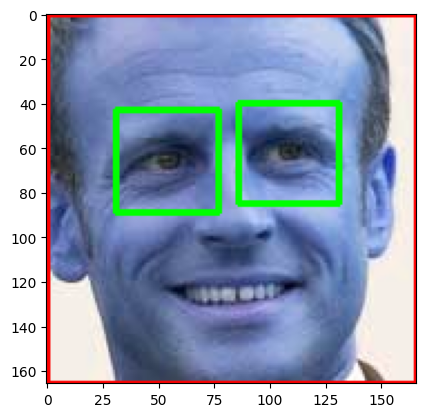

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(166, 166, 3)

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [ ]:
!pip install PyWavelets

import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

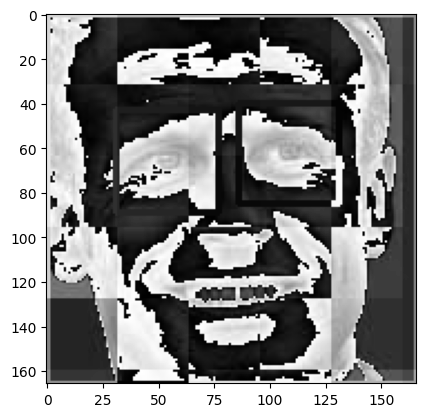

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

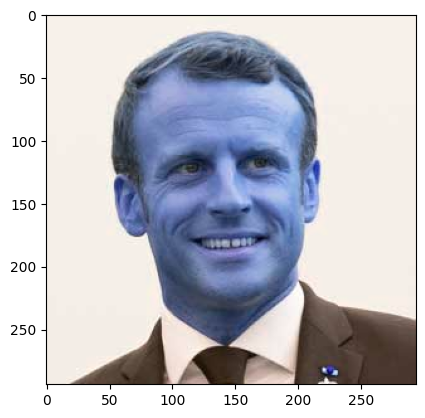

In [ ]:
original_image = cv2.imread('/content/test_images/EmmanuelMacron.jpg')
plt.imshow(original_image)

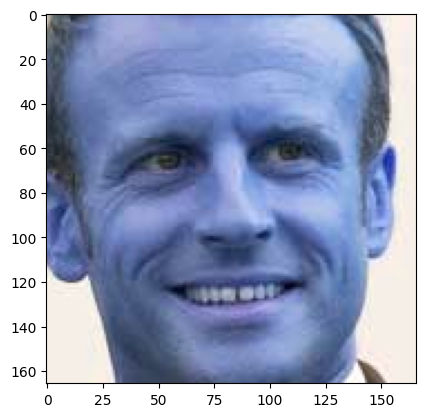

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/test_images/EmmanuelMacron.jpg')
plt.imshow(cropped_image)

**In below image face is not very clear and it doesn't have two eyes clearly visible**

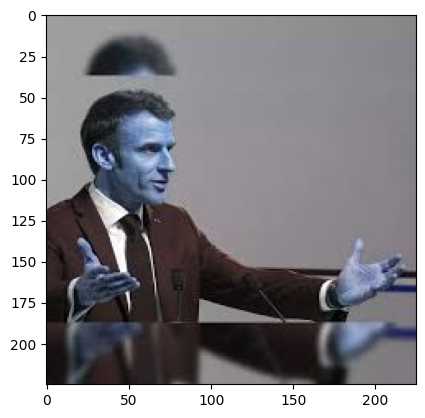

In [ ]:
import cv2
import matplotlib.pyplot as plt

org_image_obstructed = cv2.imread('/content/test_images/EmmanuelMacron2.jpg')

# Check if the image was loaded successfully
if org_image_obstructed is None:
    print("Error: Could not load image. Please check the file path and ensure the image is not corrupted.")
else:
    plt.imshow(org_image_obstructed)
    plt.show()

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/test_images/EmmanuelMacron2.jpg')
cropped_image_no_2_eyes

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [ ]:
path_to_data = "/content/dataset"
path_to_cr_data = "/content/dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/dataset/Droupadi_Murmu',
 '/content/dataset/cropped',
 '/content/dataset/Anwar_Ibrahim',
 '/content/dataset/Donald_Trump',
 '/content/dataset/.ipynb_checkpoints',
 '/content/dataset/Emmanuel_Macron',
 '/content/dataset/Tharman_Shanmugaratnam']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
import os
import cv2
import shutil

# Assuming you have your function get_cropped_image_if_2_eyes defined elsewhere

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []

    # Iterate through files within the directory, not directories
    for entry in os.scandir(img_dir):
        # Only process if the entry is a file
        if entry.is_file():
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  /content/dataset/cropped/Droupadi_Murmu
Generating cropped images in folder:  /content/dataset/cropped/Anwar_Ibrahim
Generating cropped images in folder:  /content/dataset/cropped/Donald_Trump
Generating cropped images in folder:  /content/dataset/cropped/Emmanuel_Macron
Generating cropped images in folder:  /content/dataset/cropped/Tharman_Shanmugaratnam


### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Droupadi_Murmu': ['/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu15.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu14.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu12.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu2.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu6.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu10.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu1.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu9.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu7.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu5.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu3.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu4.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu8.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu11.png',
  '/content/dataset/cropped/Droupadi_Murmu/Droupadi_Murmu13.png'],


In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Droupadi_Murmu': 0,
 'Anwar_Ibrahim': 1,
 'Donald_Trump': 2,
 'Emmanuel_Macron': 3,
 'Tharman_Shanmugaratnam': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

4096

In [ ]:
32*32*3 + 32*32

4096

In [ ]:
X[0]

array([[ 50],
       [ 50],
       [ 50],
       ...,
       [243],
       [249],
       [248]], dtype=uint8)

In [ ]:
y[0]

0

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(118, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.59      1.00      0.74        13
           4       1.00      0.83      0.91         6

    accuracy                           0.70        30
   macro avg       0.52      0.49      0.48        30
weighted avg       0.62      0.70      0.63        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.


,model,best_score,best_params
0,svm,0.783660,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.577778,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.794771,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.7

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.4

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8666666666666667

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  1,  0],
       [ 0,  1,  0,  3,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  1,  0, 12,  0],
       [ 1,  0,  0,  1,  4]])

Text(95.72222222222221, 0.5, 'Truth')

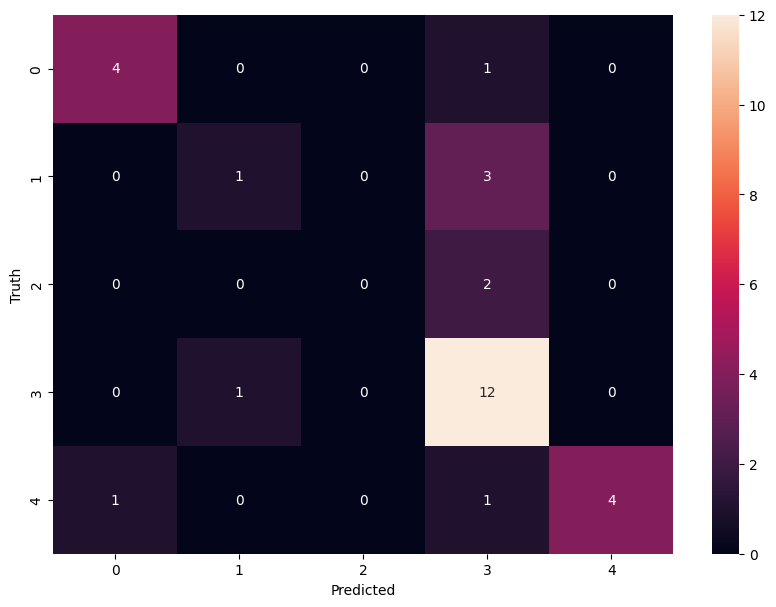

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Droupadi_Murmu': 0,
 'Anwar_Ibrahim': 1,
 'Donald_Trump': 2,
 'Emmanuel_Macron': 3,
 'Tharman_Shanmugaratnam': 4}

### Save the trained model

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save class dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))